### Описание проекта  
Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

### Инструкция по выполнению проекта    
Загрузите и изучите данные.    
Ответьте на вопрос и обоснуйте решение.       
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново)    
a. Изменится. Приведите примеры матриц.    
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.      
Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.    
Запрограммируйте этот алгоритм, применив матричные операции.  
Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

### Описание данных  
1. Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
2. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

### Загрузка и изучение данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('C:/Users/sazon/Downloads/insurance.csv')

In [4]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0
4,1,28.00,"26,100.00",0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
print(f'\nЯвных дубликатов в данных: {df.duplicated().sum()}')


Явных дубликатов в данных: 153


In [9]:
df = df.drop_duplicates()

In [10]:
print('\nПропусков в данных\n')
print(df.isna().sum())


Пропусков в данных

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


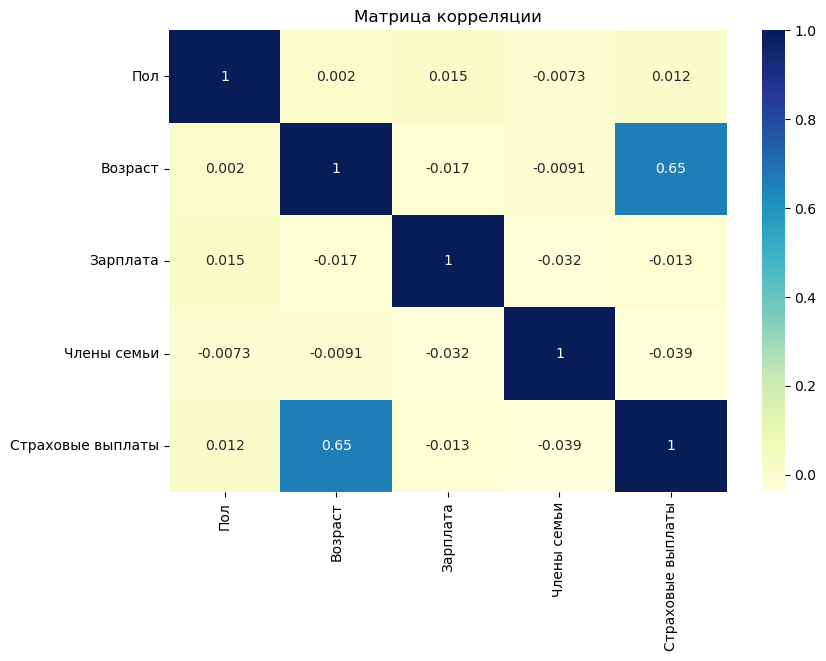

In [11]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Матрица корреляции')
plt.show()

**Посмотрим распределения количественных данных**

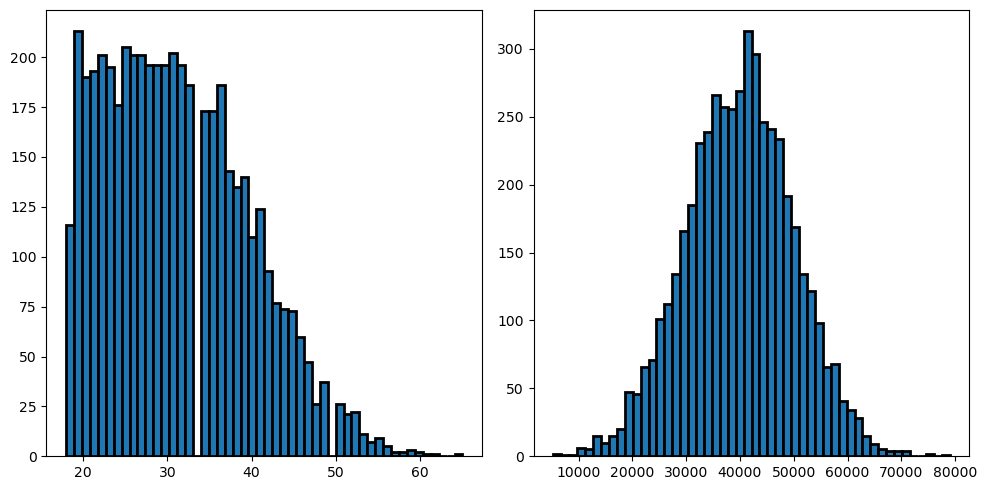

In [12]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2) 


ax1.hist(df['Возраст'], bins=50, edgecolor='black', linewidth=2)
ax2.hist(df['Зарплата'], bins=50, edgecolor='black', linewidth=2)


plt.tight_layout()
plt.show()

In [67]:
px.histogram(df, 
             x = 'Пол', 
             color = 'Пол', 
             barmode = 'group', 
             text_auto = True, 
             )

**Посмотрим распределния категориальных переменных**

In [14]:
px.histogram(df, 
             x = 'Члены семьи', 
             color = 'Члены семьи', 
             text_auto = True, 
             )

In [15]:
px.histogram(df, 
             x = 'Страховые выплаты', 
             color = 'Страховые выплаты', 
             text_auto = True, 
             )

In [16]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"4,847.00","4,847.00","4,847.00","4,847.00","4,847.00"
mean,0.50,31.02,"39,895.81",1.20,0.15
std,0.50,8.49,"9,972.95",1.10,0.47
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,200.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [17]:
df['Страховые выплаты'].value_counts()

Страховые выплаты
0    4284
1     423
2     114
3      18
4       7
5       1
Name: count, dtype: int64

### Выводы    
Выбросов не наблюдается, пропусков тоже, нашли 153 явных дубликатов и удалили их.  
Пол  50/50 мужчин и женщин.  
Среднее значение возрасата 31 лет. Распределение скошено влево.  
По зарплате распределение близко к нормальному.  
В семье в среднем 1,2 члена семьи, но медианное значение равно 1.   
Страховые выплаты 4284 человек не получали никогда страховых выплат, 423 - одни раз, 114 - 2 раза и тд. Один клиент получил выплаты целых 5 раз.

### Умножение матриц

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится, изменится лишь вектор весов линейной регрессии для новых признаков.

**Обоснование:**

Представим нашу новую матрицу признаков как результат умножения исходной матрицы признаков на некую обратимую матрицу:

$$
X_1 = XP
$$

Тогда наша формула обучения примет вид: $w_1 = (X_1^T X_1)^{-1} X_1^T y$

Подставив в нее значения $X_1$, получим: $w_1 = ((XP)^T XP)^{-1} (XP)^T y$

Воспользуемся следующими свойствами матриц, а именно:
$$A(BC) = (AB)C$$
$$(AB)^{-1} = A^{-1}B^{-1}$$
$$(AB)^T = A^TB^T$$
$$(A^T)^{-1} = (A^{-1})^T$$
$$(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$$
$$AA^{-1} = E$$
$$AE=EA=A$$
Тогда нашу формулу для расчета вектора весов можно переписать:
$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y \Leftrightarrow
$$
$$
w_1 = (P^T (X^T X) P)^{-1} (XP)^T y \Leftrightarrow
$$
$$
w_1 = (P^T (X^T X) P)^{-1} P^T X^T y \Leftrightarrow
$$
$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \Leftrightarrow
$$
$$
w_1 = P^{-1} (X^T X)^{-1} E X^T y \Leftrightarrow
$$
$$
w_1 = P^{-1}w
$$

Тоже самое, для формулы предсказаний: $a_1 = X_1w_1$, подставив получившиеся значения $X_1 = XP$ и $w_1 = P^{-1}w$ , получим:
$$a_1 = XPP^{-1}w \Leftrightarrow a_1 = Xw$$

Тем самым получаем, что наши предсказания никоем образом не изменятся.

### Алгоритм преобразования

- (1) матрица признаков Х включает значения, которые должны быть закодированы

- (2) для контроля вычисляются значения метрики R2, полученные по результатам обучения и предсказания модели на незакодированном датасете с признаками

- (3) для кодирования создается обратимая матрица Р с размерностью, обеспечивающей получение после умножения матрицы с закодированными признаками той же размерности, что и у исходного датасета Х. Для создания обратимой матрицы может быть применена функция np.random.randint()

- (4) в обязательном порядке проводится проверка матрицы Р на обратимость. Проверка на обратимость может быть проведена с помощью функции numpy.linalg.inv(), - если вызов функции со сгенерированной обратимой матрицей не приведет к ошибке, созданная обратимая матрица действительно обратима. В случае, если выполнение функции numpy.linalg.inv() заврешилось ошибкой, необходимо вернуться, создать новую матрицу и проверить ее на обратимость, - до тех пор, пока не будет получена обратимая матрица

- (5) датасет с признаками Х умножается на обратимую матрицу. Результатом является новый датасет Х с закодированными признаками (персональными данными клиентов)

- (6) проводится обучение модели, получение предсказаний на сгенерированном датасете, признаки которого умножены на обратимую матрицу

- (7) вычисляются значения метрики R2 на закодированных данных

- (8) проводится сравнение значений метрики R2 до и после кодирования признаков. Разница должна быть равна нулю или практически равна нулю

- (9) в случае, если необходимо повысить точность расчета значений метрики R2, при машинном обучении до и после кодирования необходимо выделить обучающий и тестовый комплект. Кодируются датасеты с признаками. Целевой признак кодировать не нужно

**Обоснование**

В предыдущем пункте мы выяснили, что предсказания на измененной и изначальной матрице не должны отличаться, поэтому результаты метрики R2 должны оказаться равны. Тем самым мы докажем, что правильно защитили наши данные.

### Проверка алгоритма

**Из датасета выделим обучающие признаки и целевые признаки**

In [18]:
df.shape

(4847, 5)

In [19]:
features = df.drop('Страховые выплаты', axis = 1)
features.shape

(4847, 4)

In [20]:
target = df['Страховые выплаты']

In [21]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = 1234)

In [22]:
features_train.shape, target_train.shape

((3635, 4), (3635,))

In [23]:
features_test.shape, target_test.shape

((1212, 4), (1212,))

**Создадим class для объекта LinearRegression, который будет использован в последующем машинном обучении**

In [24]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)),
                            train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [25]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_before_encoding = r2_score(target_test, predictions)
print(f'R2 до кодирования признаков: {R2_before_encoding}')

R2 до кодирования признаков: 0.4214584784265829


**Создадим функцию, которая будет принимать на вход датасет, который необходимо умножить на обратимую матрицу; средний центр распределения (loc); стандартное отклонение распределения (scale). Функция будет возвращать квадратную матрицу, количество сторон которой соответствует количеству столбцов подаваемого на вход функции датасета. Функция возвращает обратимую матрицу только после ее предварительной проверки на обратимость.**

In [29]:
def get_rand_matrix(df, loc, scale):
    det = 0
    while det == 0:
        matrix = np.random.normal(
            loc = loc,
            scale = scale,
            size=(df.shape[1], df.shape[1]))
        det = np.linalg.det(matrix)
    return matrix

**Вызовем функцию для получения обратимой матрицы**

In [30]:
matrix = get_rand_matrix(features_train, 30, 7)
matrix

array([[34.4712934 , 30.67150303, 23.56517473, 33.6787712 ],
       [30.98937291, 21.48529156, 11.26479418, 23.12034421],
       [21.91119233, 27.44927549, 22.19342659, 39.52496911],
       [24.01879073, 24.43042612, 27.50212229, 35.49439336]])

**Проверка матрицы matrix на обратимость была проведена в функции, поэтому дополнительно проверять сгенерированную матрицу не требуется. Сгенерированная матрица подойдет для кодирования данных как датаета features_train, так и features_test, поскольку число столбцов (признаков) в этих датасетах совпадает.**

**Создадим список названий столбцов датасетов features_train и features_test**

In [31]:
columns_names = features_train.columns
columns_names

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи'], dtype='object')

**Закодируем данные датасета с признаками features_train**

In [32]:
features_train = features_train.dot(matrix)
features_train.columns = columns_names

**Закодируем данные датасета с признаками features_test**

In [33]:
features_test = features_test.dot(matrix)
features_test.columns = columns_names

In [34]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_after_encoding = r2_score(target_test, predictions)
print(f'R2 до кодирования признаков: {R2_after_encoding}')

R2 до кодирования признаков: 0.42145863789613147


- Как мы увидели на практике домножение признаков на обратимую квадратную матрицу не повлияло на качество модели.
- Данные успешно зашифрованы и неподготовленный человек не сможет проанализировать наши данные.  
- В то же время это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.  